# 0. Package Installation - Restart Required

Please run the following line to install the required packages for today's training. Make sure to **restart your kernel** after the installation is finished.

In [ ]:
%run day_2_package_installation.ipynb

# Visualizations with Pandas

# 1. Introduction

The Pandas library will probably be your first option to create visual insights to better understand your data.
The main advantage is that you can visualize the data using simple and straightforward methods. Behind the scenes of plotting with Pandas is another library - Matplotlib. But don't worry now about Matplotlib as we will cover it in a later lesson. When we call some Pandas' plotting function, Matplotlib acts as an engine. Therefore we can use a higher level of code to gain similar good-looking plots as in Matplotlib.

# 2. Dataset

We will be working with an occupancy detection dataset which can be found [here](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#). 

This dataset is intended to solve binary classification problems according to attributes which could indicate whether a person is present in the room or not.

Let's import the Pandas library and load the data.

In [5]:
# Import Pandas and Numpy libraries
import pandas as pd
import numpy as np

# For now, we use Matplotlib only to set the size of plots
import matplotlib.pyplot as plt

# rcParams allow us to set the size global to the whole notebook 
plt.rcParams['figure.figsize'] = [10,6]
# In some plots, we define the size within the plotting function

In [2]:
# Load the data
data = pd.read_csv('../Data/room_occupancy.txt')

In [3]:
# Take a look at the first 10 rows
data.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
6,2015-02-11 14:53:00,21.7600,31.260000,437.333333,1014.333333,0.005042,1
7,2015-02-11 14:54:00,21.7900,31.197500,434.000000,1018.500000,0.005041,1
8,2015-02-11 14:55:00,21.7900,31.393333,437.333333,1018.666667,0.005073,1
9,2015-02-11 14:55:59,21.7900,31.317500,434.000000,1022.000000,0.005060,1
10,2015-02-11 14:57:00,21.7900,31.463333,437.333333,1027.333333,0.005084,1


In [4]:
# Print number of rows and columns
data.shape

(9752, 7)

## 2.1 Attributes explanation

Firstly, let's examine what variables we are dealing with.

- date: the specific day and time when the values were recorded 
- Temperature: measured in Celsius
- Humidity: relative humidity - a present state of absolute humidity relative to a
    maximum humidity given the same temperature expressed as a percentage
- Light: measured in Lux
- CO2: in ppm (parts per million)
- HumidityRatio: derived quantity from temperature and relative humidity, expressed in kilograms of water vapor per kilogram of dry air  
- Occupancy: the presence of a person in the room. The occupancy of the room was obtained from pictures that were taken every minute for a period of 8 days (1 if a person is present, 0 otherwise)

### 2.1.2 Exploring the data
Let's look at the variables data type using `.dtypes` attribute.

In [5]:
# Check variables data type
data.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

There are 6 numerical variables in the dataset. Almost all of the variables have been correctly interpreted according to their datatypes, except for the 'date' column, which Python recognized as an object. Convert this object datatype to the datetime datatype using Pandas. 

In [7]:
# Convert date variable using Pandas to_datetime method
data['date'] = pd.to_datetime(data['date'])

Let's check whether there are some missing values that we need to be aware of. 

In [8]:
# Explore descriptive statistics
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [9]:
# Check missing values
data.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

# 3. Plot method

The `.plot()` function

This plotting function is simply a wrapper around `Matplotlibs` plot function that create a **lineplot** by default. A lineplot plots each data point of a DataFrame and then draws a straight, continuous line connecting these values.

---

If you call `.plot()` right onto the DataFrame, all of the features will be plotted. This approach is sometimes not quite good as you can see below. There are several variables with similar low values, thus they are overlapping. 

<AxesSubplot:>

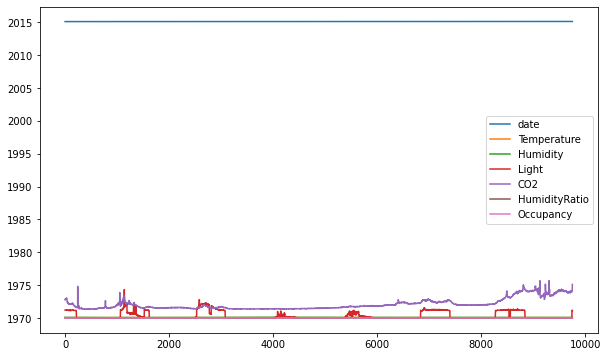

In [10]:
# Create a lineplot of the DataFrame
data.plot()

Let´s create a violet line plot of variable 'Temperature'. You can select desired variable by indexing the DataFrame with square brackets. 

<AxesSubplot:>

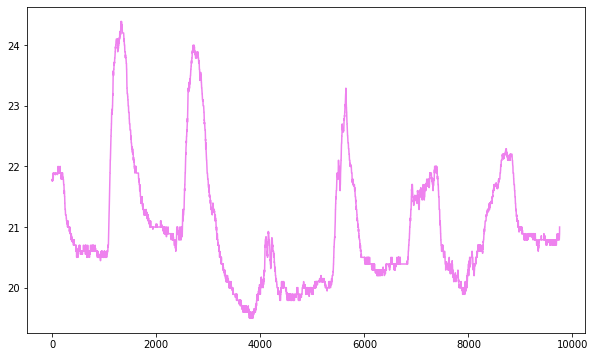

In [11]:
# Create a line plot of Temperature variable 
data['Temperature'].plot(color = 'violet')

Now only 'Temperature' is plotted with its respective values.

You can see that the `plot()` function returns an ```<AxesSubplot:>``` object. But what does this mean? 

For now, remember that each graph is actually represented as a _Figure object_ that serves as the base. Onto this base there is an Axes object in which the x-axis and y-axis are created. In the latter section, we will discuss more details about Figures and Axes. 
To avoid displaying this label, you can put a semicolon at the end of the line.

---
It is also possible to plot multiple columns by passing a **list** of respective variables, separated by a comma within square brackets and then call `.plot()`. Pandas sets the colors of lines automatically so that you will be able to distinguish the features. You can manually specify the colors of the lines by using the `color` parameter. Chosen colors need to be passed in a dictionary.  See the following example:

``` data[['variable_1', 'variable_2']].plot(color = {'variable_1':'yellow', 'variable_2': 'black'})```

Also the legend is placed by default. 

**Try it yourself in the following task.**

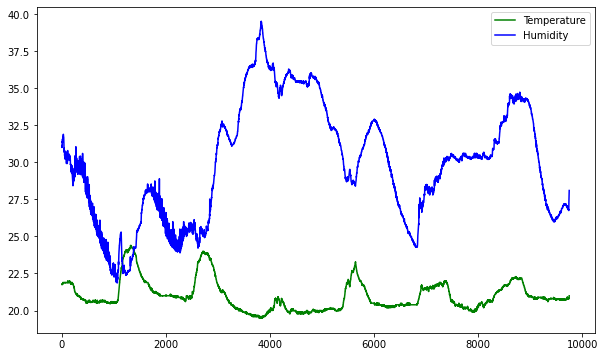

In [12]:
# TASK 1 >>> Create a lineplot of variables 'Temperature' and 'Humidity'
#        >>> Set the color of Temperature to green and Humidity to be blue
#        >>> In the created plot, observe how humidity and temperature have been decreasing and increasing

data[['Temperature','Humidity']].plot(color = {'Temperature':'green', 'Humidity':'blue'});

## 3.1 Customizing parameters of a line plot

It is possible to plot one column against another one as we see in the example below. We specify the 'date' feature on the x-axis and 'CO2' feature on the y-axis.
Within the `.plot()` method you can set several parameters such as title, axis labels, size of plot, etc. For more information about parameter settings take a look at [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

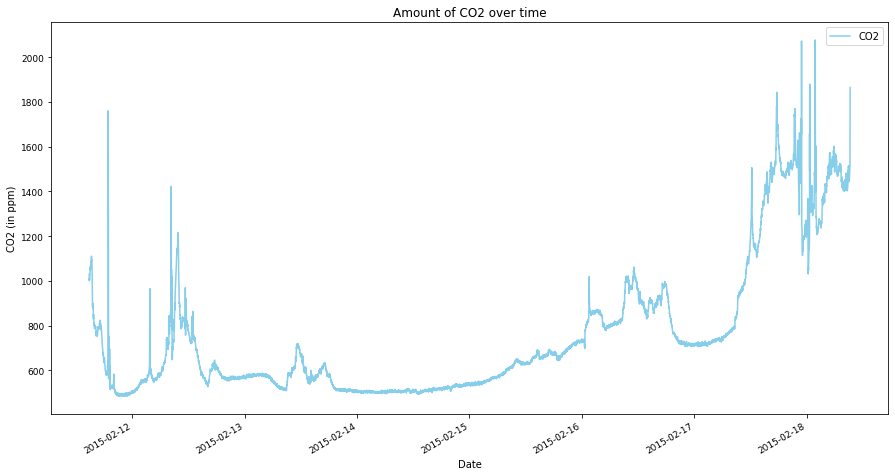

In [13]:
# A lineplot of amount of CO2 per date

data.plot(x = 'date', y = 'CO2',             # Specifying variabes on the axis
          figsize = (15,8),                  # Setting a Figure object size as a tuple
          fontsize = 9,                      # Setting ticks font size 
          color = 'skyblue',                 # Setting a color
          title = 'Amount of CO2 over time', # Setting a title of a plot 
          xlabel = 'Date',                   # Customizing x-axis label (variable name by default)
          ylabel = 'CO2 (in ppm)');          # Customizing y-axis label (no label by default)

The line plot is showing a trend of CO2 amount over a period of time from 12.02.2015 (Thursday) till 18.02.2015 (Wednesday). The graph displays how the amount of CO2 has decreased during the weekend (14.02.2015 - 15.02.2015). 

## 3.2 Plotting approaches and plot kinds

Before we proceed with the other kinds of plots, there is an important thing to mention:

**There are different ways to plot your data**. To not to get confused later on, let's clarify them a little bit. 

In the preceding examples, we use the default `plot()` function that creates **a line plot by default**. 

**First approach:**
- select a specific plot style by using the `kind `parameter.

Overall, there are 10 plot styles you can specify as an argument provided as a string:

- `hist`    - histogram  
- `box`     - boxplot  
- `bar`     - vertical barplot  
- `barh`    - horizontal barplot  
- `scatter` - scatterplot  
- `pie`     - pie plot  
- `kde`     - density plot  
- `density` - density plot  
- `area`    - area plot  
- `hexbin`  - hexagonal bin plot  

**Second approach:**

- all of these plots can be created using the corresponding plotting functions:

- `DataFrame.plot.line`
- `DataFrame.plot.hist`
- `DataFrame.plot.box`
- `DataFrame.plot.bar`
- `DataFrame.plot.barh`
- `DataFrame.plot.scatter`
- `DataFrame.plot.pie`
- `DataFrame.plot.kde`
- `DataFrame.plot.density`
- `DataFrame.plot.area`
- `DataFrame.plot.hexbin`

For a histogram and a boxplot there are aditionally two plotting functions: `DataFrame.hist()` and `DataFrame.boxplot()`.

It is up to you which of the two approaches you will decide to stick with.

### 3.2.1 Histogram


A histogram is a handy plot to get a picture of the spread of data points. It creates so-called bins that you can think of as particular ranges of values. Each data point falls into the respective bin according to its value and then the number of data points in each bin are counted. 

Look at some statistics computed on the feature 'HumidityRatio'. We know the lowest and the highest ratio, the average value, and that 50% of values are under 30.0045, etc. But it´s hard to imagine how the distribution of 9752 observations looks like based these summary statistics.

In [14]:
# Take a look at the descriptive statistics using .describe()
data.HumidityRatio.describe()

count    9752.000000
mean        0.004589
std         0.000531
min         0.003275
25%         0.004196
50%         0.004593
75%         0.004998
max         0.005769
Name: HumidityRatio, dtype: float64

Let's create a histogram of the variable 'HumidityRatio'. You can use the `.plot()` method and specify `kind = "hist"` within this method. Again, we select desired column by indexing the DataFrame. In this case, Pandas does not create an x-axis label. Since the `plot` function returns `matplotlib.axes.AxesSubplot`object, we have access to Matplotlib capabilities and can specify labels.

`plt.xlabel` for the x-axis  
`plt.ylabel` for the y-axis

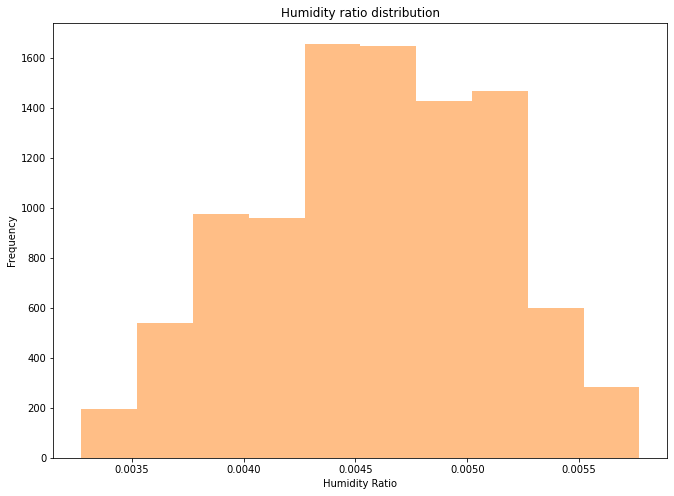

In [15]:
# The Humidity ratio
data['HumidityRatio'].plot(kind ='hist',
                      figsize = (11,8),
                      color = '#ff7f0e',
                      alpha = .5,                            # Setting the transparency of a color                
                      title = 'Humidity ratio distribution')

plt.xlabel('Humidity Ratio');                                # Creating x-axis label

Now we can see all of the 9752 data points plotted in one graph. In the resulting graph, we can see how the values are spread across a range from about 0.003 to 0.005. Most data points lie in the range of values 0.0043 to 0.0047.

Be default, this method separates all of the records into 10 bins. To verify whether our resulting graph accurately reflects the underlying data we should have some fun and try to use different numbers of bins. Using different numbers of bins will change the visual appearance of the histogram.

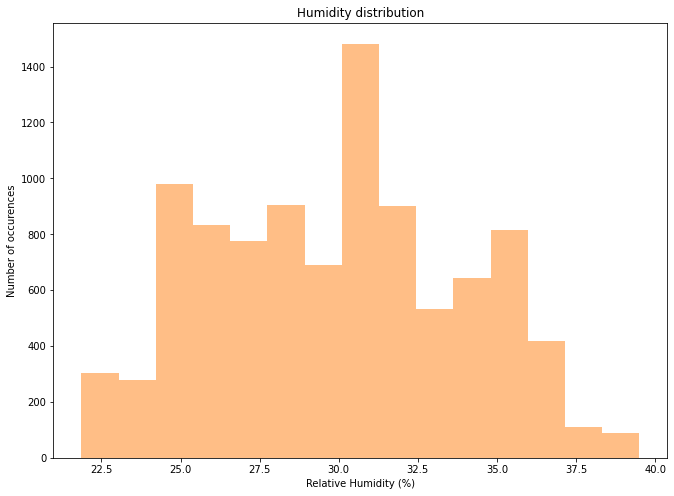

In [16]:
# TASK 2 >>> Create a histogram of 'Humidity' in the same way as above
#        >>> Try yourself to change the number of bins and observe the output 
#        >>> Play around and change the size of the plot and the transparency to see the differences
#        >>> Set the x-axis label to 'Relative Humidity (%)'
#        >>> Change the default y-axis label (Frequency) to 'Number of occurences'

data['Humidity'].plot(kind ='hist',
                      figsize = (11,8),
                      bins = 15,
                      color = '#ff7f0e',
                      alpha = .5,
                      title = 'Humidity distribution')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Number of occurences');

By applying `.hist()` to the DataFrame, we are able to create a histogram of the selected column or columns. It is also posibble to visualize a distribution of all the features of the dataset.

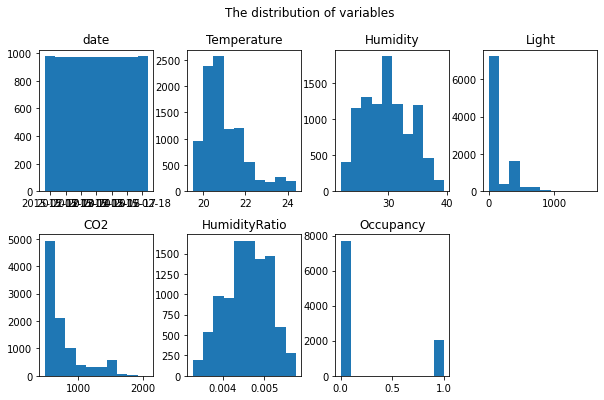

In [19]:
# The data distribution of the whole DataFrame

data.hist(layout=(2,4), grid = False)                    # Setting layout of 2 rows and 4 column and disabling the grid
plt.suptitle('The distribution of variables');           # Adding a suptitle using Matplotlib

### 3.2.2 Boxplot (box-and-whisker plot)

Another approach to visualize the distribution of the data is using boxplots. Moreover, the resulting plot will include a [five-number summary](https://en.wikipedia.org/wiki/Five-number_summary): the smallest data point value, the first quartile (1Q), the median (Q2), the third quartile (Q3) and the largest data point value. Boxplots can reveal to us whether there are some possible outliers in the DataFrame and whether the data distribution is skewed or rather symmetrical.

In order to draw a boxplot you can use the `.plot()` method and specifying the `kind` keyword argument as 'box'. If we want to customize things such as color, width or style of the line, we can use the `boxprops`,`whiskerprops`,`medianprops` and `capprops` parameters.

In [3]:
# A boxplot of relative humidity

data['HumidityRatio'].plot(kind = 'box', 
                           figsize = (9,5),
                           boxprops = dict(linewidth = 1.5, color = 'green',linestyle = '-.'),# Customizing the box
                           whiskerprops = dict(linewidth = 1.5, color = 'pink'),              # Customizing the whiskers
                           medianprops = dict(linewidth = 1.5, color = 'red'),                # Customizing median line
                           capprops = dict(linewidth = 1.5, color = 'darkblue'),              # Customizing caps on the whiskers
                           title = 'Boxplot of Humidity ratio');

This boxplot illustrates how the values of the humidity ratio are spread out. Based on the shape it seems that the distribution is rather symetrical and also that there are no extreme values, e.g. outliers. The actual box represent 50% of records along with the median value that is displayed as a red line. You can return actual values (of quartiles/percentiles) using the `quantile` method.

In [21]:
# Compute 25th percentile, median value and 75th percentile of HumidityRatio variable
perc_25, median, perc_75 = data.HumidityRatio.quantile([.25,.5,.75])

In [22]:
# Print the output
perc_25, median, perc_75

(0.004196307174011725, 0.0045933097710052, 0.004997965656951225)

The alternative is to use Pandas' built-in method `DataFrame.boxplot()`. Since the boxplots are really usefull when comparing two or more groups, we'll look at the amount of carbon dioxide according to a person's presence. Selecting groups you'd like to compare can be done using `by` parameter with the respective variable. We'll adjust the figure size and rename the x-tick labels.

The axis grid lines are displayed by default. You can disable showing these lines by setting the parameter `grid = False`.

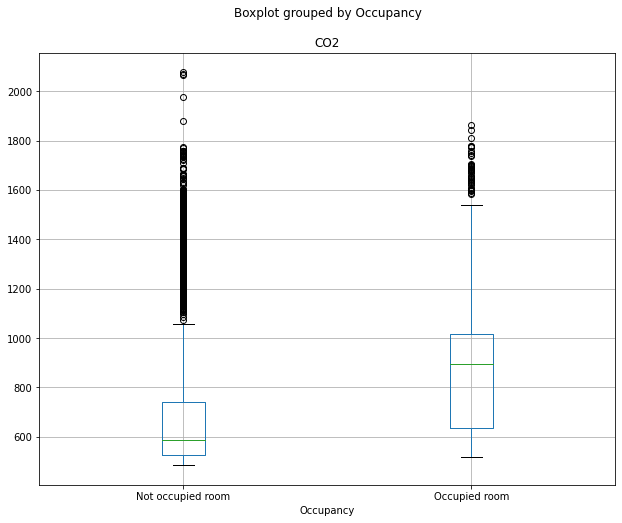

In [23]:
# A boxplot of CO2 by occupancy of the room

data.boxplot(figsize = (10,8),
             column = 'CO2', 
             by = 'Occupancy')

# Setting the x-tick labels using Matplotlib
plt.xticks([1,2], ['Not occupied room','Occupied room']);

Comparing the distribution of two groups can helps us to better understand the data. From the boxplots you can immediately see the difference in amounts of CO2. When the room is occupied, the amount of carbon dioxide is higher, while 50% of data points have values in the range of about 620 up to slightly above 1000 ppm. Also the median values are completely different. When the room is empty, the amount of carbon dioxide is substantially lower, although plot indicates a lot of outliers. 

### 3.2.3 Bar plot

Bar plots are useful when we want to compare categorical data based on their values. Each category will be plotted on the x-axis and the height of the bars will represent the corresponding values. 

Let's create a simple DataFrame of students and theirs exam scores for illustration. 

In [24]:
# Example data

sample_data = pd.DataFrame({'Student': ['Thomas','Margaret','Lisa','John','Elis','Sally','Marc','Angela','Sebastian'],
                            'Score': [78,50,68,83,99,98,65,90,85],
                            'Class': ['A','B','B','B','A','A','A','B','A']})
sample_data

,Student,Score,Class
0,Thomas,78,A
1,Margaret,50,B
2,Lisa,68,B
3,John,83,B
4,Elis,99,A
5,Sally,98,A
6,Marc,65,A
7,Angela,90,B
8,Sebastian,85,A


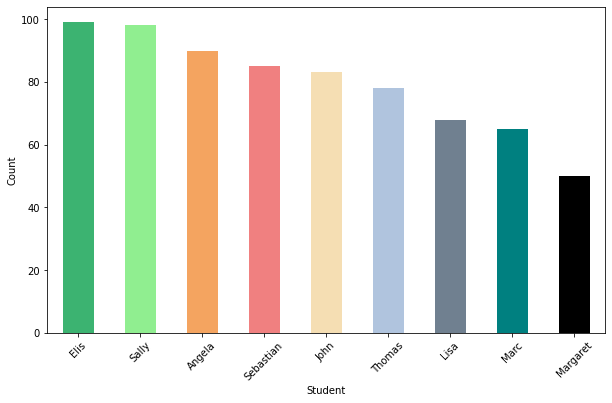

In [25]:
# A vertical barplot of students by their score

sample_data.sort_values(by = 'Score', ascending = False).plot(x = 'Student', 
                                                              y = 'Score',
                                                              kind = 'bar', 
                                                              rot = 45,
                                                              color = ['mediumseagreen','lightgreen','sandybrown',
                                                                      'lightcoral','wheat','lightsteelblue',
                                                                      'slategrey','teal','black'],
                                                              legend = False)
plt.ylabel('Count');

For creating a bar plot, we sort the values by score in a descending fashion to display student's score. If your categories have longer labels, it's appropriate to set rotation `rot` in order to avoid overlapping. You can explicitly set color of each bar either through specifying the color names or the hexadecimal color codes to the `color` parameter.

See this [link](https://seaborn.pydata.org/tutorial/color_palettes.html) from Seaborn where the general principles of using color in plots are described. 
___

You can also choose one of the built-in colormaps provided by Matplotlib. Colormaps can be accessed through `plt.cm` (`cm` stands for colormap). After that, specify a chosen colormap by its name. A reversed version of each available colormap can be done by appending `_r`to a colormap's name. Using Numpy's `arange()` function we specify an interval of colors we want to select. 

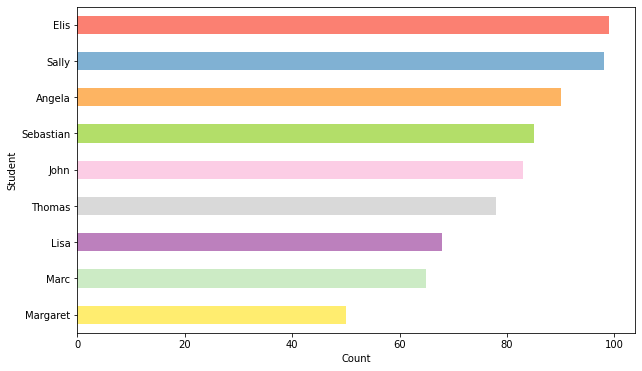

In [26]:
# TASK 3 >>> Reuse the code above and create a horizontal barplot (kind = 'barh') of students score
#        >>> Set the colormaps with code: plt.cm.Set3_r(np.arange(len(sample_data)))
#        >>> Disable a legend
#        >>> Set x-axis label to 'Count'

sample_data.sort_values(by = 'Score').plot(x = 'Student', 
                                           y = 'Score',
                                           kind = 'barh', 
                                           color = plt.cm.Set3_r(np.arange(len(sample_data))),
                                           legend = False)
plt.xlabel('Count');

To visualize the count of students based which class they are in, we count the number of occurences and plot it.

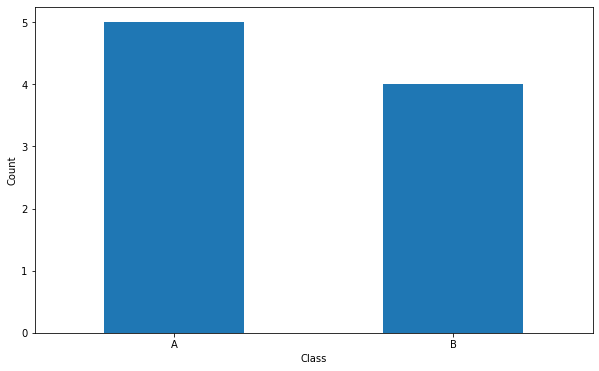

In [27]:
sample_data.Class.value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel('Class')
plt.ylabel('Count');

# 4. Practice time

For the further visualizations we'll use data related to habits of individuals in terms of eating habits, transportation and devices they use and attributes of physical condition. This dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#).

In [7]:
# Read the data
data_ob = pd.read_csv('../Data/obesity_data.csv')

In [29]:
# Take a look at the data
data_ob

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## 4.1 Attributes explanation

The first 5 features contain some basic information about individuals along with the information about the presence of overweightedness in a family.

- Gender: the gender
- Age: the age
- Height: the height 
- Weight: the weight 
- family_history_with_overweight: family member who is/was overweight

Columns related to eating habits:

- FAVC: whether an individual consumes high caloric food frequently
- FCVC: how frequently vegetables are used in main meals
- NCP: the number of main meals per day
- CAEC: consuming any food between main meals
- SMOKE: smoking
- CH2O: consumption of water per day

Columns related to physical condition:
- SCC: caloriy intake tracking
- FAF: physical activity frequency
- TUE: usage of technological devices per day
- CALC: alcohol consumption
- MTRANS: type of transportation

The last feature 'NObeyesdad' was created using the equation for the BMI (Body Mass Index) for each individual. Resulting values were compared with the data provided by the WHO (World Health Organization) and the Mexican Normativity. 

Resulting labels:

-Underweight (< 18.5)   
-Normal (18.5 - 24.9)   
-Overweight (25 - 29.9)  
-Obesity I (30 - 34.9)  
-Obesity II (35 - 39)  
-Obesity III (> 40)  

### 4.1.1 Exploring the data

In [30]:
# Check the column's data type
data_ob.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [31]:
# Explore descriptive statistics
data_ob.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [32]:
# Check missing values
data_ob.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [33]:
# Count the number of duplicated rows
data_ob.duplicated().sum()

24

In [34]:
# Remove duplicated rows
data_ob.drop_duplicates(inplace = True)

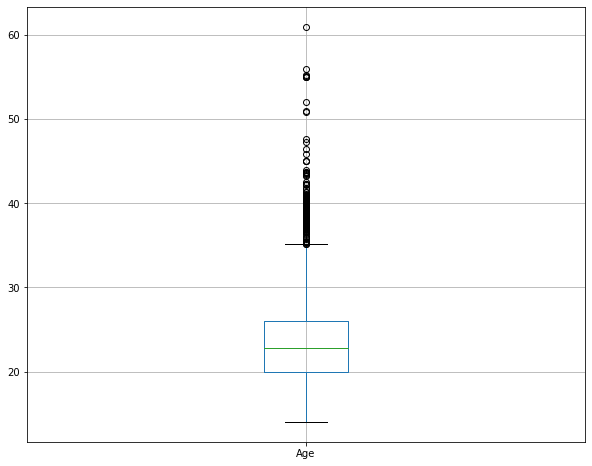

In [35]:
# TASK 4 >>> Create a boxplot of the 'Age' feature
#        >>> Set the size of the plot to (10,8)

data_ob.boxplot(column = 'Age',
                figsize = (10,8));

> What can you say about the distribution of ages? How old is the majority of people ? Is the distribution symmetrical or are there people who are older compared to the majority?

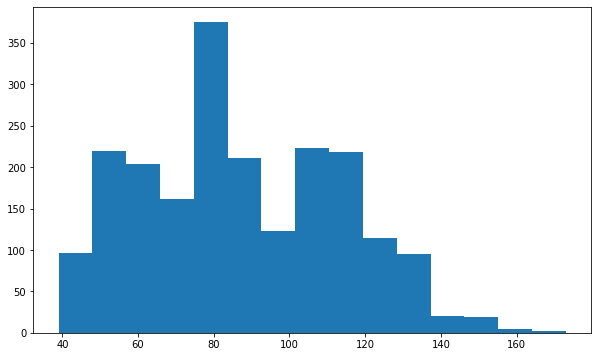

In [36]:
# TASK 5 >>> Visualize the distribution of the 'Weight' feature using a histogram
#        >>> Disable the grid lines
#        >>> Set different numbers of bins

data_ob.Weight.hist(bins = 15, 
                    grid = False);

> Based on the histogram, what is the most common weight? Does this distribution look symmetrical, or rather bimodal? Could a different number of bins reflect the data better?

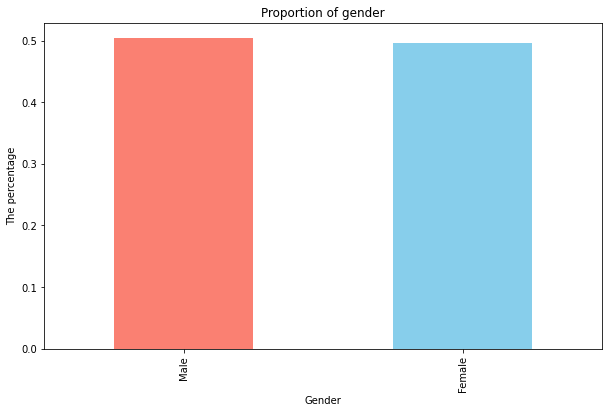

In [37]:
# TASK 6 >>> Create a normalized barplot of 'Gender' 
#        >>> Specify the parameter normalize = True to get percentages instead of counts
#        >>> Assign different colors to male and female (male to 'salmon', female to 'skyblue')
#        >>> Add title: 'Proportion of gender'
#                x-axis label: 'Gender' 
#                y-axis label: 'The percentage'

data_ob.Gender.value_counts(normalize = True).plot(kind = 'bar', 
                                                   color = ['salmon','skyblue'], 
                                                   title = 'Proportion of gender')
plt.xlabel('Gender')
plt.ylabel('The percentage');

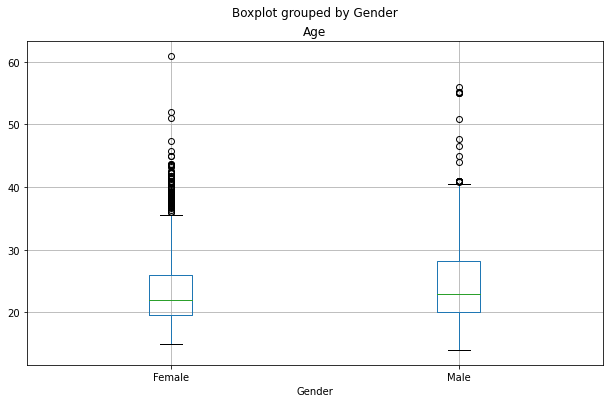

In [38]:
# TASK 7 >>> Create boxplots of 'Age' split by gender

data_ob.boxplot(column = 'Age', 
                by = 'Gender');

> Compare the ranges of values for male and female: Is the distribution similar or is there some difference? Do you see any outliers? 

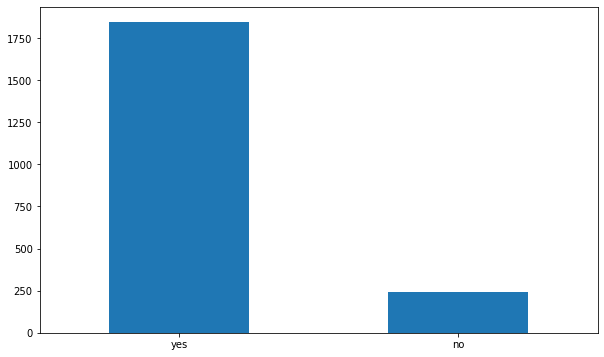

In [39]:
# TASK 8 >>> Find out how many people frequently eat high caloric meals ('FAVC')
#        >>> Set rotation of x-ticks to 0 degrees

data_ob.FAVC.value_counts().plot(kind = 'bar', 
                                 rot = 0);

The question we might ask regarding obesity levels could be: 'Which individuals are more likely to be obese based on their age?' or 'Are younger adults overweight?'.

Firstly, let's look how many levels are there. We call the `.value_counts()` method on the 'Nobeyesdad' column and sort categories based on the obesity level.

In [40]:
# Counting values of the obesity levels
data_ob.NObeyesdad.value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: NObeyesdad, dtype: int64

Firstly, we define the order of obesity levels in a list and assign it to the variable `obesity_levels`.

In [41]:
# Ordered categories
obesity_levels = ['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                  'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

Then we create a CategoricalDtype `ob_levels` where we specify categories and orderness.

In [42]:
# Creating CategoricalDtype 
ob_level = pd.api.types.CategoricalDtype(ordered = True, categories = obesity_levels)

The last step is to convert the original data type of the 'NObeyesdad' feature to CategoricalDtype.

In [43]:
# Converting 'NObeyesdad' to created categoricalDtype
data_ob.NObeyesdad = data_ob.NObeyesdad.astype(ob_level)

We can plot obesity levels to see how these vary according to the age of individuals. To avoid overlapping label names of these categories, you can set the rotation of labels to 45 degrees with the `rot` parameter. Also, disabling grid lines can help visualization to be more comprehensible.

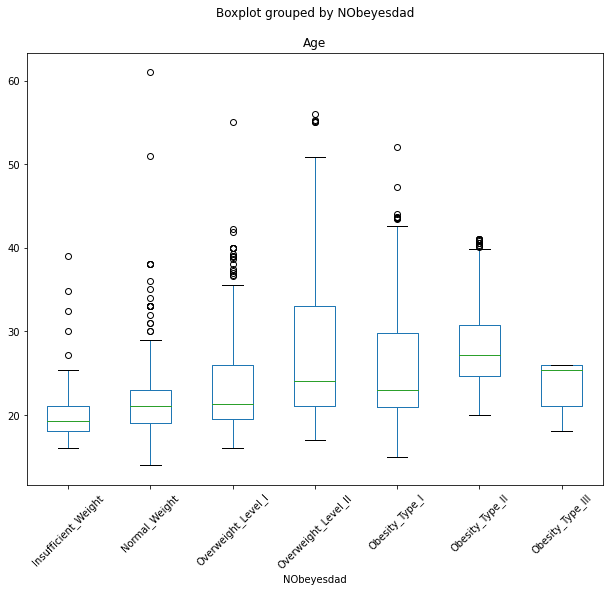

In [44]:
# TASK 9 >>> Create a boxplot of the column 'Age' grouped by 'NObeyesdad'
#        >>> Set the figure size to (10,8)
#        >>> Set the labels on x-axis to 45 using the rot parameter
#        >>> Disable the grid lines

data_ob.boxplot(figsize = (10,8),
                column = 'Age', 
                by = 'NObeyesdad',
                rot = 45, 
                grid = False);

> Looking at the created plot, can you see some pattern? At what ages do people tend to suffer from some kind of obesity level? 

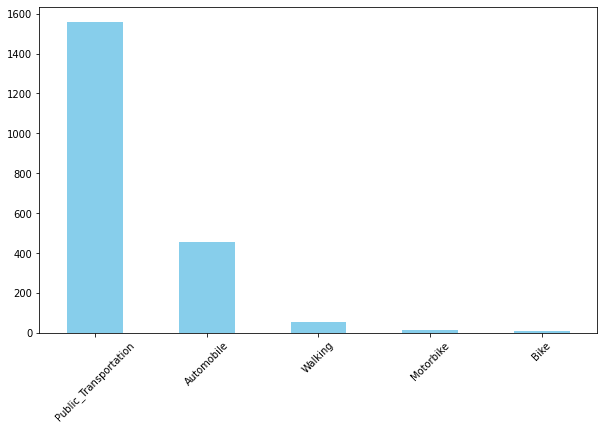

In [45]:
# TASK 10 >>> Create a bar plot of 'the MTRANS' feature to find out how many people use a certain kind of transportation
#         >>> Set the labels on the x-axis to 45 using rot parameter
#         >>> Set the color to 'skyblue'
#         >>> What is the most popular kind of transportation? 

data_ob.MTRANS.value_counts().plot(kind='bar', 
                                   rot = 45, 
                                   color = 'skyblue');

Let's filter only those individuals who use an automobile for transportation or who walk. Then we will look at their weight.

In [47]:
# Filter only those rows where transportation kind is 'Automobile' and 'Walking'
# DataFrame.query will be explained more in a later notebook, so don't worry about it now
subset_transport = data_ob.query('MTRANS in ["Automobile","Walking"]')

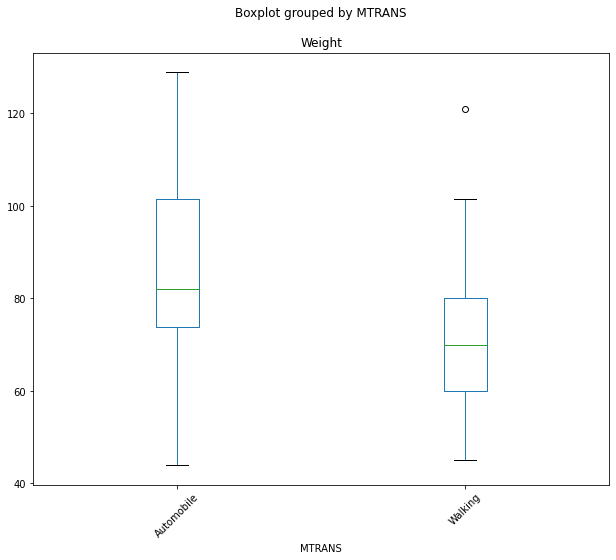

In [48]:
# TASK 11 >>> Create a boxplot of the newly created subset_transport DataFrame
#         >>> Set the figure size to (10,8)
#         >>> Set 'Weight' as the column parameter and 'MTRANS' as the by parameter
#         >>> Set the labels on the x-axis to 45 using the rot parameter
#         >>> Disable the grid lines

subset_transport.boxplot(figsize = (10,8),
                         column = 'Weight', 
                         by = 'MTRANS',
                         rot = 45, 
                         grid = False);

> What can you say about the distribution of these two groups of people? Which group has a lower weight overall? Looking at the boxplots, I think this is a motivation for all of us to consider the type of transportation next time we need to go somewhere :) 

### Citation request:
Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models. Luis M. Candanedo, Véronique Feldheim. Energy and Buildings. Volume 112, 15 January 2016, Pages 28-39.

Palechor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 104344.

Material adapted for RBI internal purposes with full permissions from original authors. [Source](https://github.com/zatkopatrik/authentic-data-science) 